Link to datasets - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

## **Linear Regression**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

**Equation of a Line**

Identify the line fit to the data by an intercept b0 and a slope b1

The equation of the line is y = b0 + b1x


Example problem - 

**What is the relationship between the price and weight of diamonds?**

**Regression Analysis**

Using a sample of diamonds of various weights, regression analysis produces an equation that relates weight to price

Let y denote the response variable and let x denote the explanatory (or predictor) variable

The image below shows the relationship between cost of diamond and weight of diamond. This relationship can be modelled into a linear regression problem.

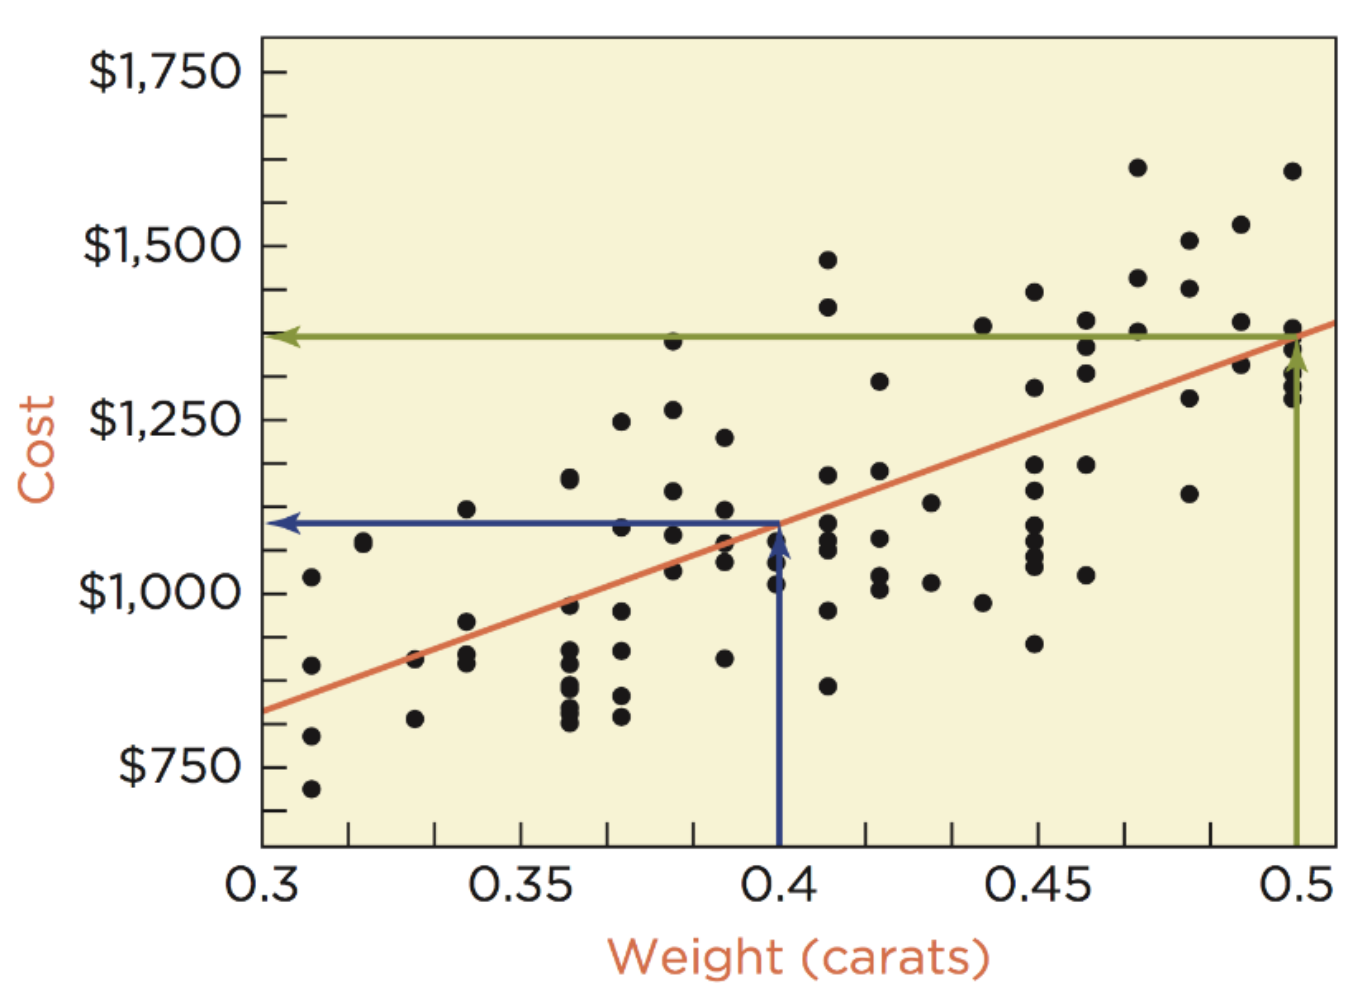

The equation of the line will be - 

  Estimated Price = 15 + 2,697 * Weight

**Interpretation from the graph**

Intercept - Average response when x = 0 and where the line crosses the y axis

Slope - Estimates the marginal cost (additional cost for each additional weight) used to find the total cost




**Least Squares**

Residual Vertical deviation of a point from the line 

The best fitting line collectively makes the squares of the residuals as small as possible

The choices of b0 and b1 minimize the sum of the squared residuals

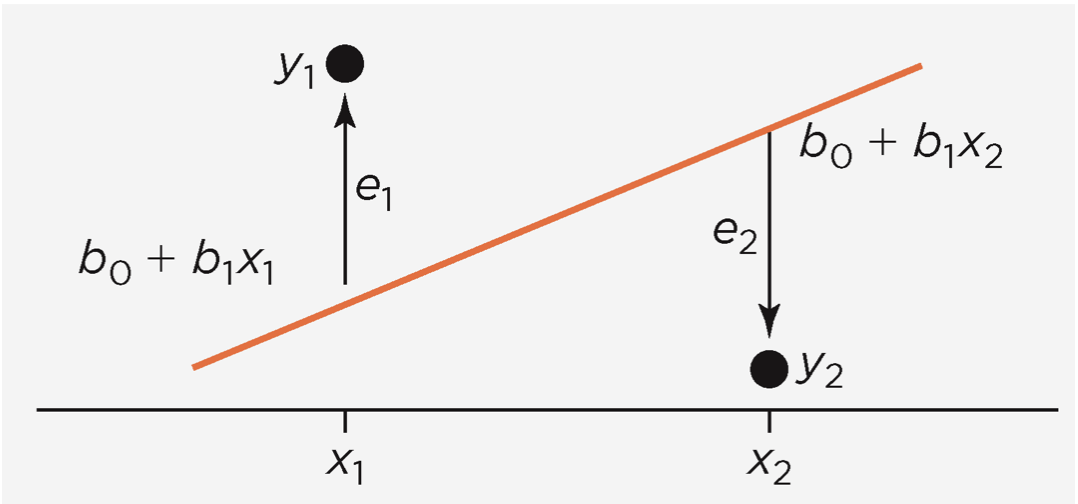


**Residuals**

Show variation that remains in the data after accounting for the linear relationship defined by the fitted line

If the least squares line captures the association between x and y, then a plot of residuals versus x should have no pattern

**Standard Deviation of Residuals**

Measures how much the residuals vary around the fitted line

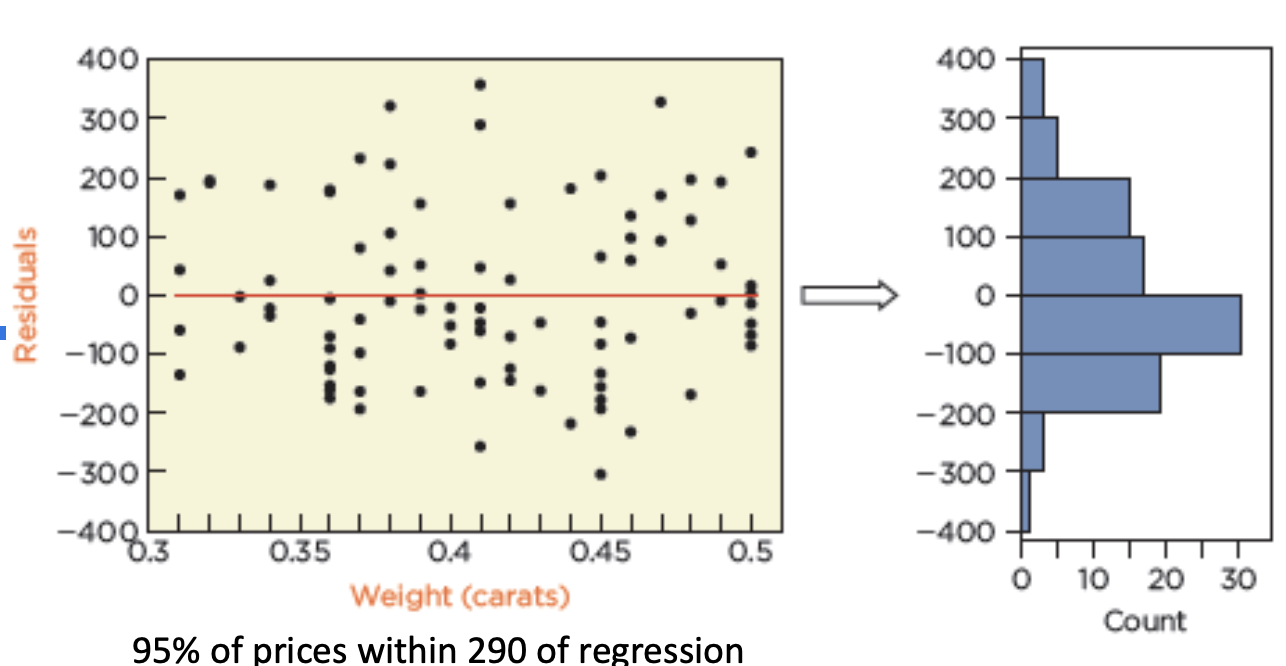


**R-Squared (r2)**

Square of the correlation between x and y

Fraction of the variation accounted for by the least squares regression line

r2 = 0.5 line explains 50% of the variation in price


## **Scikit-learn **

https://scikit-learn.org/stable/

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Simple Linear Regression example

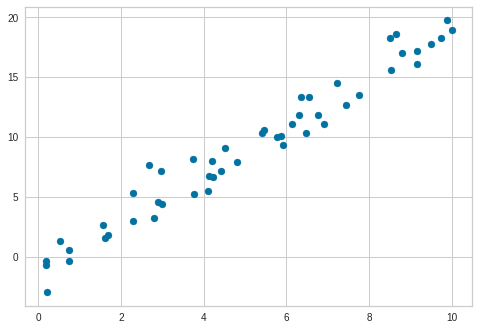

In [ ]:
x = 10 * np.random.rand(50)
y = 2 * x - 1 + np.random.randn(50)

plt.scatter(x, y)
plt.show()

[1.93889163]
-0.7843853849812099


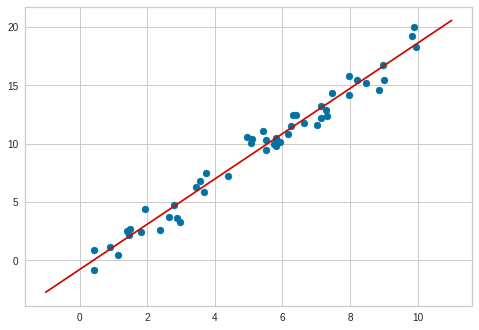

In [ ]:
# Choose a class of model

# import the Linear Regression class
from sklearn.linear_model import LinearRegression

x = 10 * np.random.rand(50)
y = 2 * x - 1 + np.random.randn(50)

# Choose model parameters

model = LinearRegression(fit_intercept=True)

# Arrange data
# Numpy newaxis is used to increase  the dimension of a numpy array.
# print(X.ndim) to know the dimension of the array X

X = x[:, np.newaxis]

# fit the model to the data
model.fit(X, y)

print(model.coef_)
print(model.intercept_)


# Predict label for unknown data

xfit = np.linspace(-1, 11, num=50)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r')
plt.show()

## Example - Titanic dataset

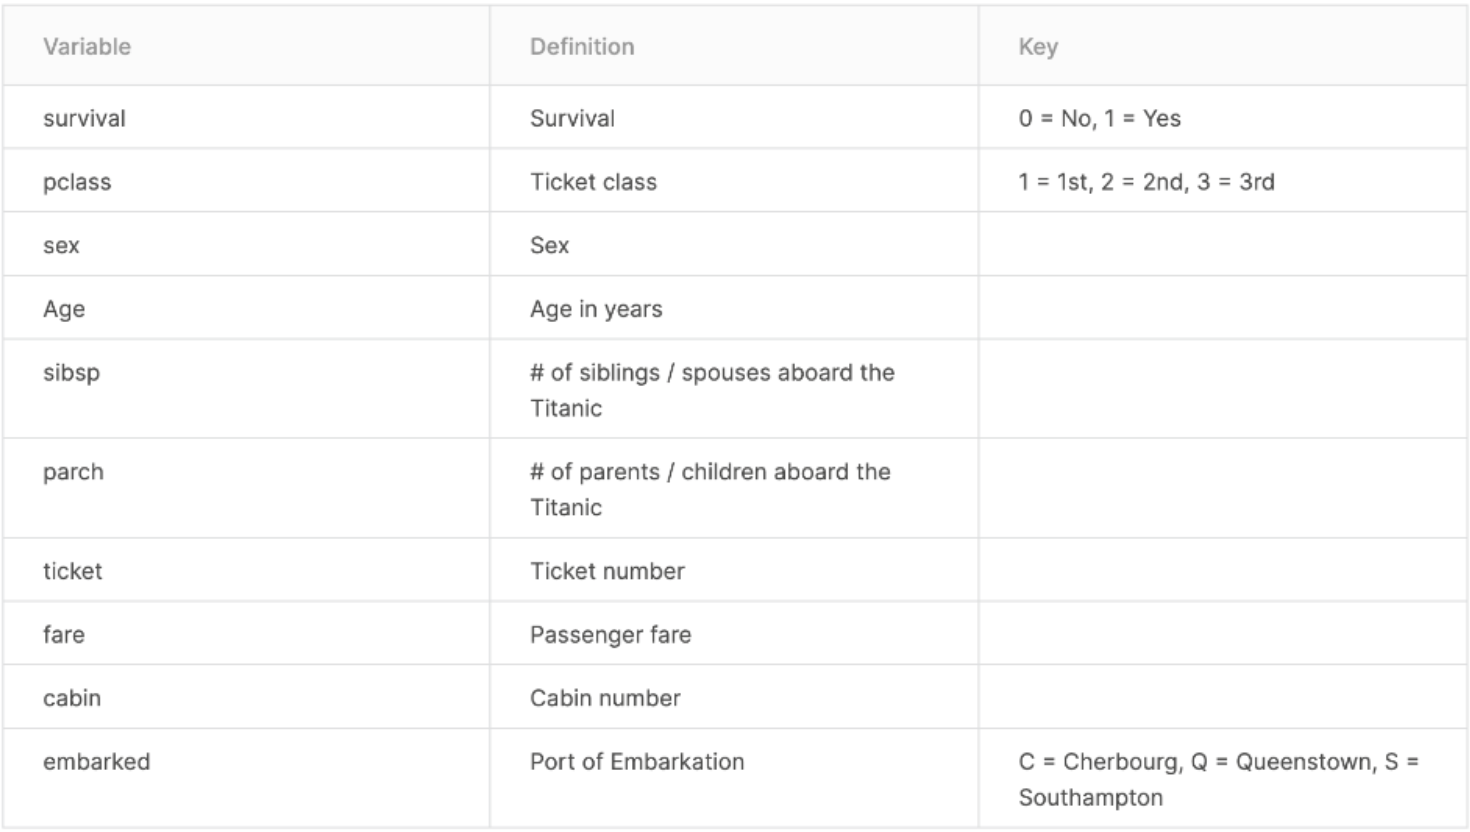

Attributes - 
age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


### Data Wrangling



PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 

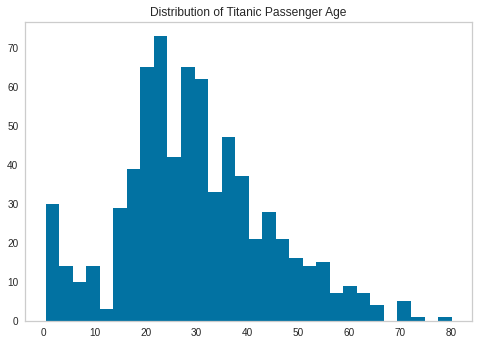

In [ ]:
# read and explore the dataset

pd.set_option('display.max_columns', None)

df = pd.read_csv('titanicTrain.csv')
#print(df.head())
#print(df.info())
#print(df.describe())

# check for missing values
print(df.isnull().any())
print(df.isnull().sum() / len(df) * 100)

# Drop or replace missing values with metric (mean)
# Can also use ML to predict missing values -- "data imputation"

dfDropRows = df.dropna(axis=0)
print(dfDropRows.info())

dfDropCols = df.dropna(axis=1)
print(dfDropCols.info())

# drop all the rows (samples) with missing values in specific column
dfClean = df.dropna(subset=['Embarked'])

# drop specific column
dfClean = dfClean.drop(columns=['Cabin'])

print(dfClean.info())

dfClean = df.dropna(subset=['Age', 'Embarked'])

# drop specific columns
dfClean = dfClean.drop(columns=['Cabin'])

print(dfClean.info())

plt.hist(dfClean.loc[~dfClean['Age'].isnull(), 'Age'], bins=30)
plt.title('Distribution of Titanic Passenger Age')
plt.grid()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB
None
count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


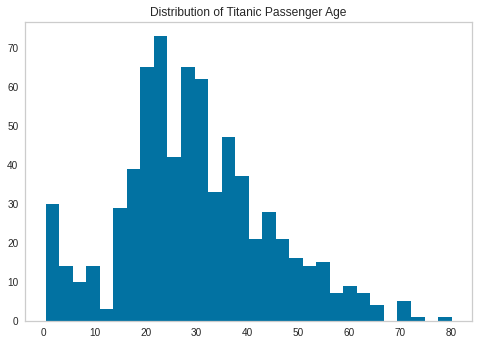

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   A

In [ ]:
# Fill missing values -- reading data again 
pd.set_option('display.max_columns', None)

df = pd.read_csv('titanicTrain.csv')
# drop all the rows (samples) with missing values in specific columns
dfClean = df.dropna(subset=['Embarked'])

# drop specific columns
dfClean = dfClean.drop(columns=['Age', 'Cabin'])

print(dfClean.info())

df = pd.read_csv('titanicTrain.csv')
# drop all the rows (samples) with missing values in specific columns
dfClean = df.dropna(subset=['Embarked'])

# drop specific columns
dfClean = dfClean.drop(columns=['Cabin'])

print(dfClean['Age'].describe())

plt.hist(dfClean.loc[~dfClean['Age'].isnull(), 'Age'], bins=30)
plt.title('Distribution of Titanic Passenger Age')
plt.grid()
plt.show()

# fill missing values
dfClean['Age'] = dfClean['Age'].fillna(dfClean['Age'].mean())
print(dfClean.info())
dfSex = pd.get_dummies(dfClean['Sex'])
dfClean = pd.concat([dfClean, dfSex], axis=1)
print(dfClean.head())

In [ ]:
# handling missing categorical data -- dummy variables

df = pd.DataFrame([['green', 'M'],
                   ['red', 'L'],
                   ['blue', 'S'],
                   ['red', 'M']])

df.columns = ['Color', 'Size']

# Mapping ordinal variables to integers
sizeMap = {'S': 1, 'M': 2, 'L': 3}

df['sizeInt'] = df['Size'].map(sizeMap)

#print(df)


# Mapping nominal variables to dummy variables
dfColors = pd.get_dummies(df['Color'])
print(dfColors)
df = pd.concat([df, dfColors], axis=1)

print(df)

   blue  green  red
0     0      1    0
1     0      0    1
2     1      0    0
3     0      0    1
   Color Size  sizeInt  blue  green  red
0  green    M        2     0      1    0
1    red    L        3     0      0    1
2   blue    S        1     1      0    0
3    red    M        2     0      0    1


In [ ]:
# categorical data handling in titanic dataset

dfSex = pd.get_dummies(dfClean['Sex'])
dfClean = pd.concat([dfClean, dfSex], axis=1)
dfClean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1


### Data Partitioning

In [ ]:
# partition data into train and test splits
from sklearn.linear_model import LinearRegression

y = dfClean['Survived']
X = dfClean.loc[:, ['Pclass', 'Age', 'female', 'male']]

print(y.shape)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)


(889,)
(889, 6)
(622,)
(622, 6)
(267,)
(267, 6)


0.3541797582029328

## Example - BOSTON HOUSING

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


1. Create a DataFrame variable containing the Boston Housing training data CSV file.
2. Determine what the dependent variable (target array) is.
3. Cleanup the DataFrame by removing non-numeric columns and discrete numeric columns
4. Convert all columns in the DataFrame to float type
5. Create a scatterplot matrix to get an overview of the relationships between all the variable pairs.
6. From the scatterplot matrix, determine which features have a strong relationship with the target. Update your cleaned up DataFrame to only include those columns.
7. Redo the scatterplot matrix with the updated features. Include a regression line.
8. Fit a simple regression model for the feature most strongly related to the target.
9. Plot the residuals to gain a better understanding of the fit of the model.


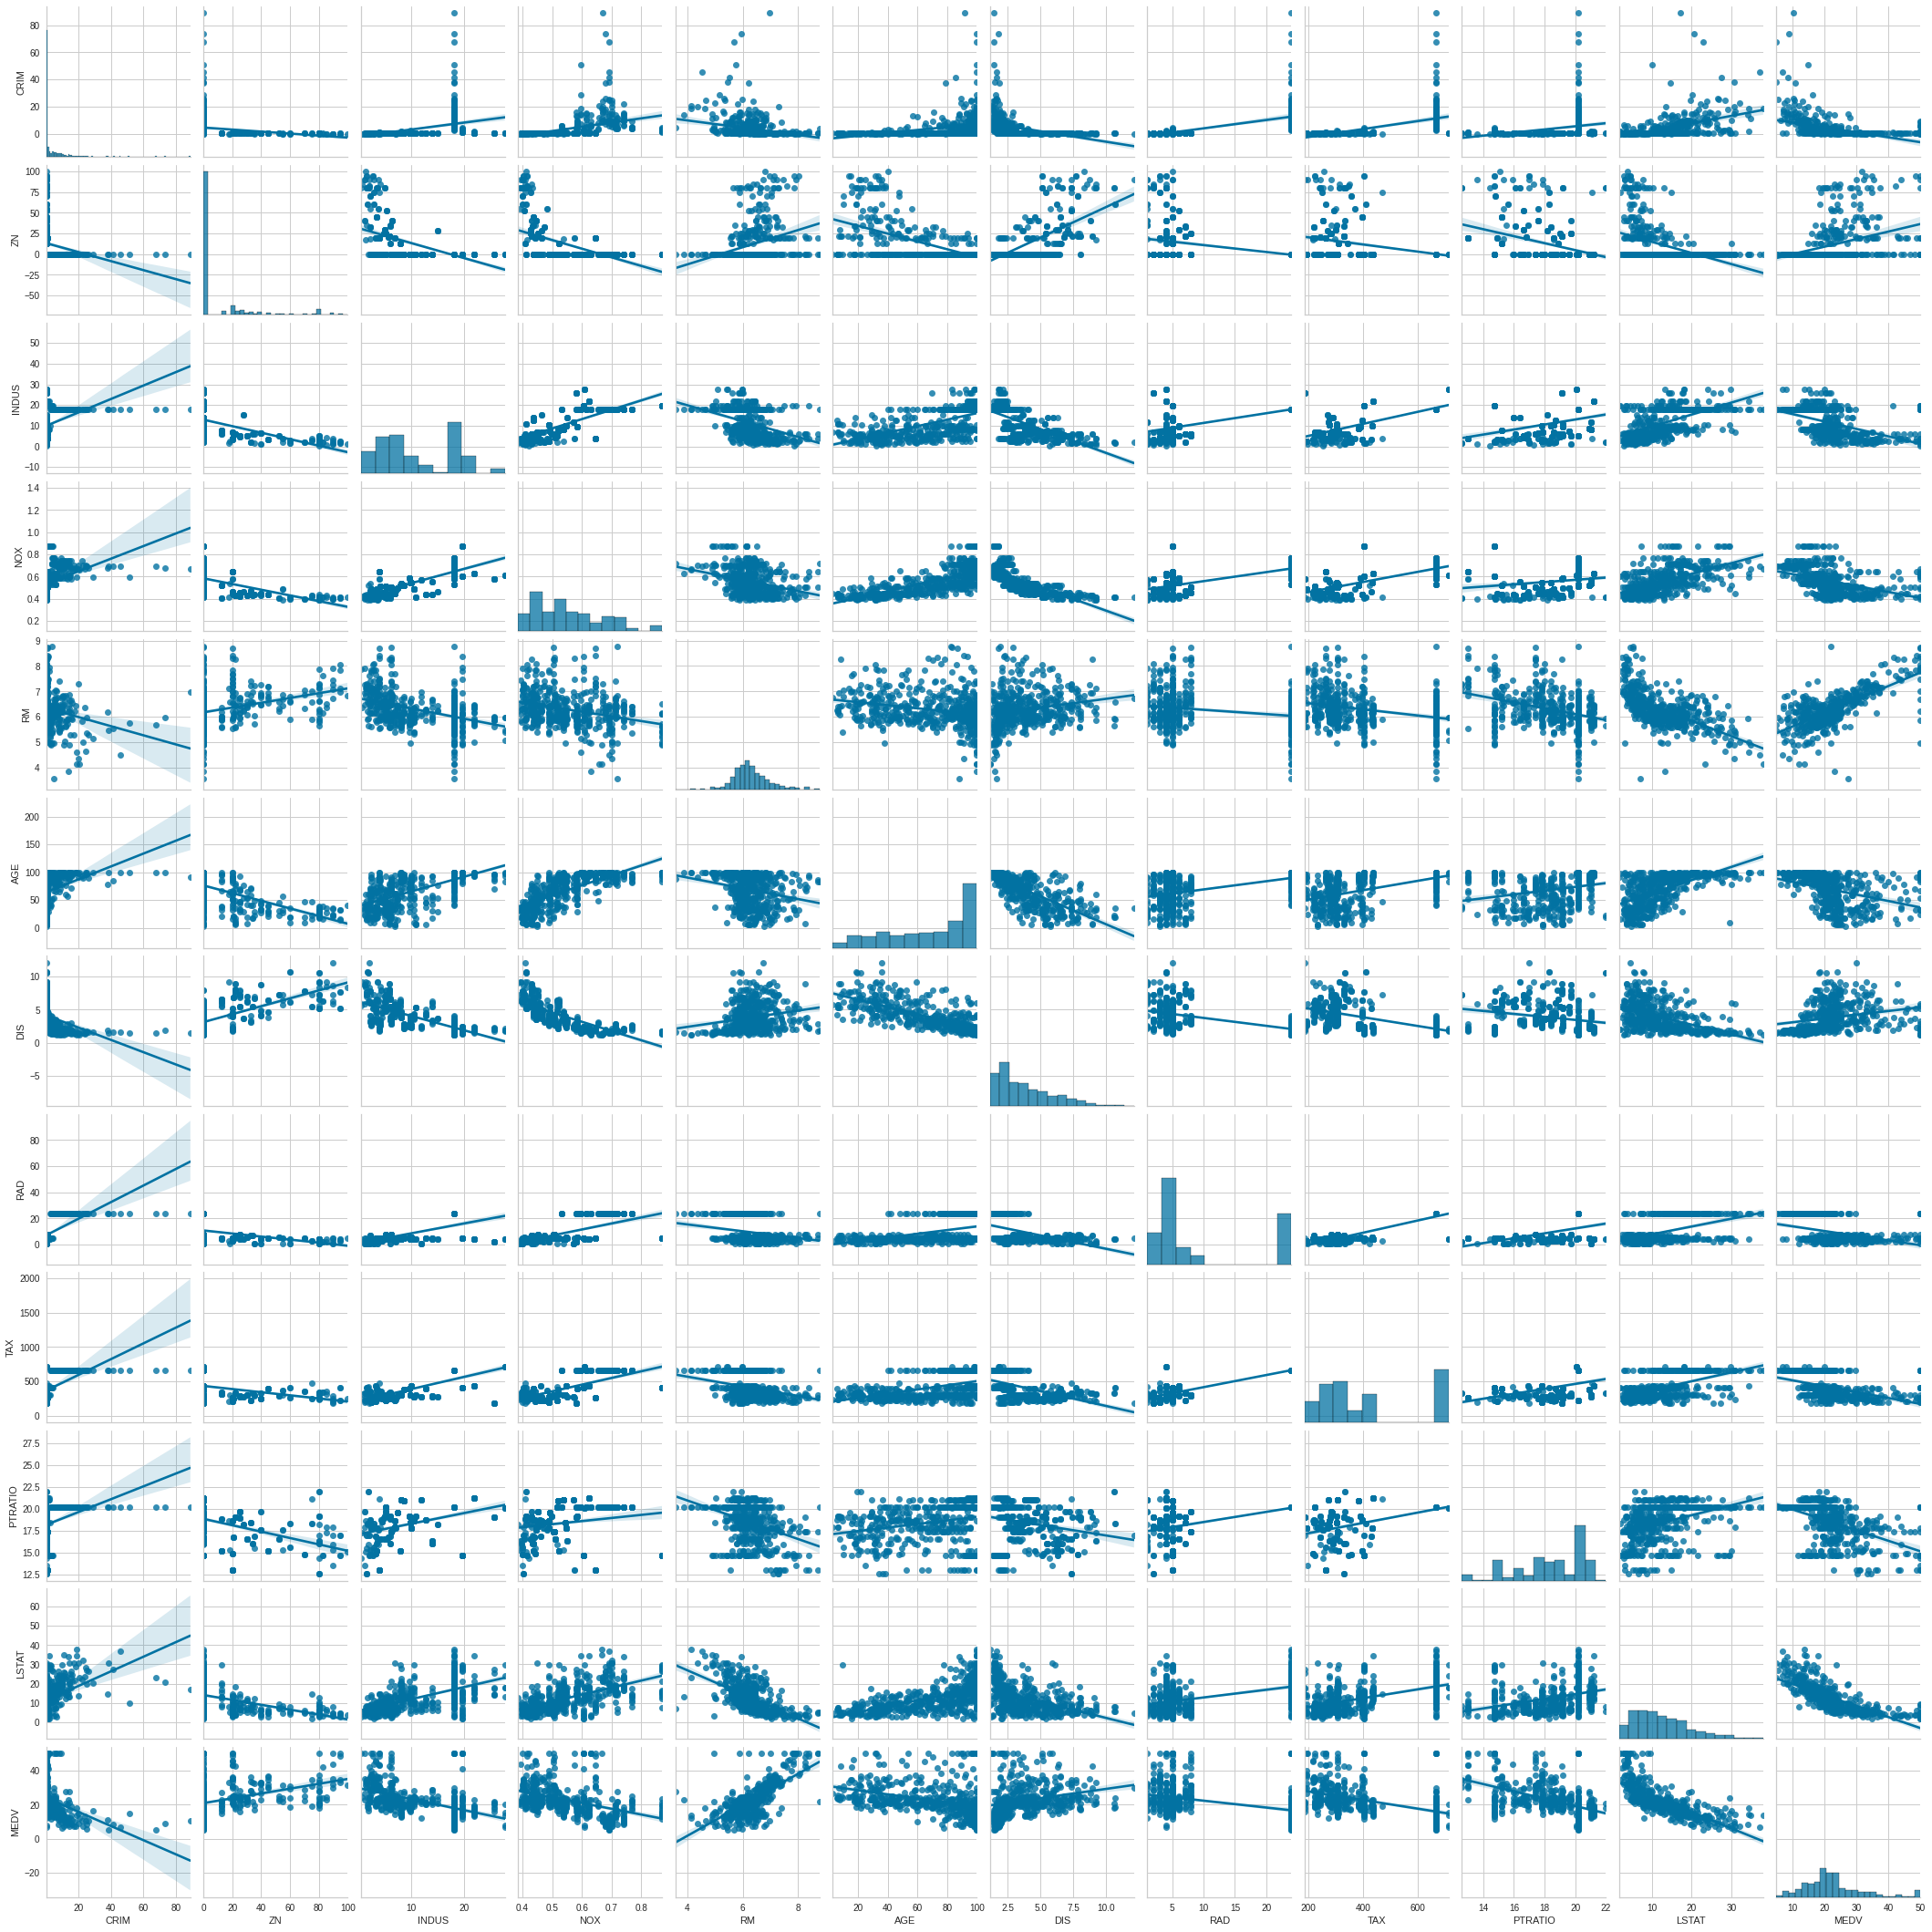

In [ ]:
import seaborn as sb

df = pd.read_csv('BostonHousing.csv')


df = df.drop(columns='CHAS')


#sb.pairplot(df,kind='reg')

model = LinearRegression()
x= boston['LSTAT']
X = x[:,np.newaxis]
y = boston['MEDV'] 
model.fit(X,y)

predicted_y = model.predict(X)
pd.scatter(x,y)
pd.plot(x,y_predicted)


visualizer = ResidualsPlot(Model)
visualizer.fit(X,y)
visualizer.plot()

In [ ]:
model = LinearRegression()
x

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

pd.set_option('display.max_columns', None)

boston = pd.read_csv('BostonHousing.csv')
print(boston.head())
print(boston.shape)
print(boston.describe())

bostonNum = boston.drop(['CHAS'], axis=1)
#print(bostonNum.dtypes)
#print(bostonNum)

bostonNum['RAD'] = bostonNum['RAD'].astype(float)
bostonNum['TAX'] = bostonNum['TAX'].astype(float)

c(bostonNum)
plt.show()


sb?

bostonNum2 = bostonNum.drop(['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'], axis=1)

# sb.pairplot(bostonNum2, kind='reg')
# plt.show()

model = LinearRegression()
x = boston['LSTAT']
X = x[:, np.newaxis]
y = boston['MEDV']
model.fit(X, y)



y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

x = boston['LSTAT'].values
X = x.reshape(-1, 1)
y = boston['MEDV']

# Instantiate the linear model and the visualizer
#ridge = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
plt.show()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
(506, 13)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25

NameError: ignored